In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
file = 'trolleberg_mfrr_up_20250703_1.csv'
#title = file
title = file[:-6]
df = pd.read_csv(file)
df['idx'] = pd.to_datetime(df['DateTime'], format='%Y%m%dT%H%M%S.%f')
#df['DateTime'] = df['DateTime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Berlin')
df = df.set_index('idx')

df.head()

,DateTime,InsAcPow,RefAcPow,Pmax,Pmin,MfrrSetP,MfrrAct,Cap_MfrrUp,Cap_MfrrDown,WindSpeed
idx,,,,,,,,,,
2025-07-03 14:50:01.599,20250703T145001.599,4304.77,4304.77,4641,460,0,0.0,3000,0,12.0
2025-07-03 14:50:02.601,20250703T145002.601,4356.45,4356.45,4646,460,0,0.0,3000,0,12.0
2025-07-03 14:50:03.602,20250703T145003.602,4413.08,4413.08,4645,460,0,0.0,3000,0,12.0
2025-07-03 14:50:04.604,20250703T145004.604,4457.80,4457.80,4638,460,0,0.0,3000,0,12.0
2025-07-03 14:50:05.605,20250703T145005.605,4446.66,4446.66,4629,460,0,0.0,3000,0,12.0


In [11]:
#mask = df['2025-06-19 11:31:22':]
#df.loc[mask.index, 'MfrrAct'] = 0

(Text(0.5, 1.0, 'trolleberg_mfrr_up_20250703'),
 None,
 <matplotlib.legend.Legend at 0x13f64b050>)

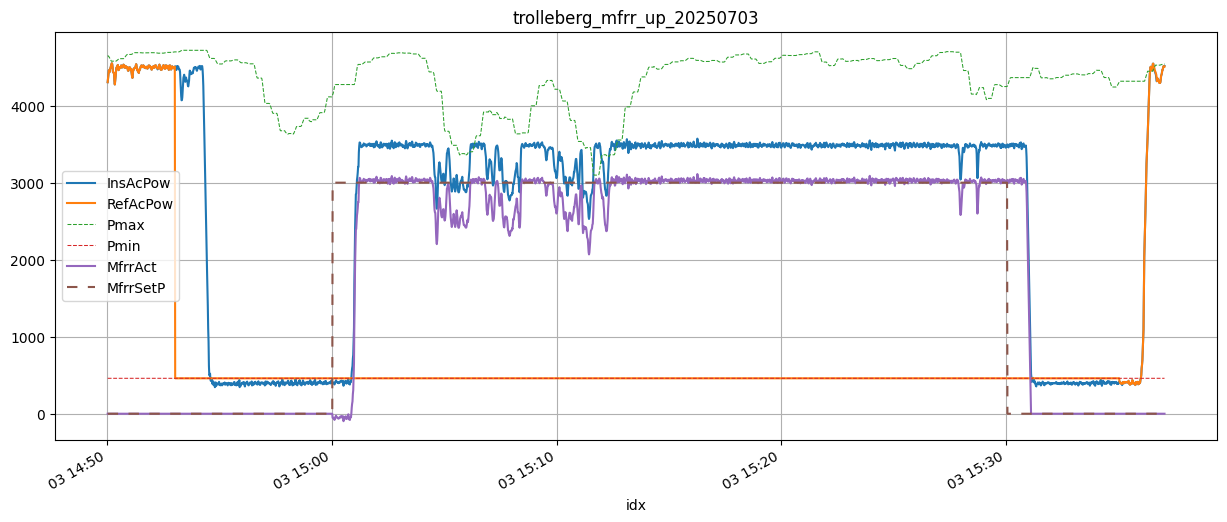

In [12]:
#df.plot(y=['InsAcPow', 'RefAcPow', 'Pmax', 'Pmin', 'MfrrSetP', 'MfrrAct'], title=f'{file}', grid=True, figsize=(15, 6))
fig, ax = plt.subplots(figsize=(15, 6))
df['InsAcPow'].plot(ax=ax, label='InsAcPow')
df['RefAcPow'].plot(ax=ax, label='RefAcPow')
df['Pmax'].plot(linestyle='--', linewidth=0.75, ax=ax, label='Pmax',)
df['Pmin'].plot(linestyle='--', linewidth=0.75, ax=ax, label='Pmin')
df['MfrrAct'].plot(ax=ax, label='MfrrAct')
df['MfrrSetP'].plot(linewidth=1.5,linestyle=(0,(5,5)), ax=ax, label='MfrrSetP')
ax.set_title(title), ax.grid(), ax.legend()

(Text(0.5, 1.0, 'Trolleberg mFRR Up 3.0MW 2025-06-19'),
 None,
 <matplotlib.legend.Legend at 0x13f2bdbb0>)

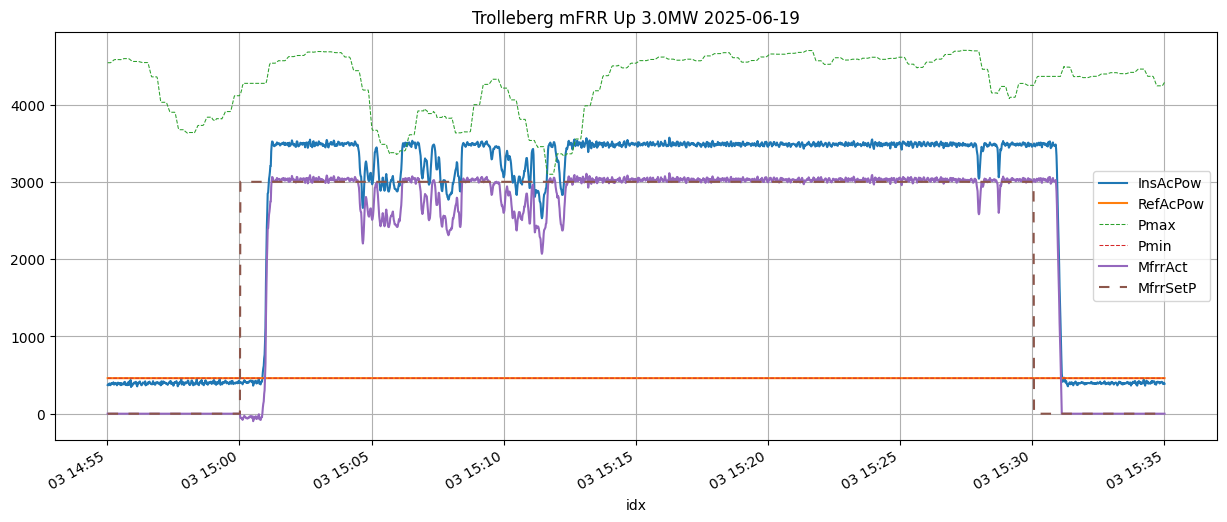

In [5]:
df_ = df['2025-07-03 14:55:00':'2025-07-03 15:35:00']
fig, ax = plt.subplots(figsize=(15, 6))
df_['InsAcPow'].plot(ax=ax, label='InsAcPow')
df_['RefAcPow'].plot(ax=ax, label='RefAcPow')
df_['Pmax'].plot(linestyle='--', linewidth=0.75, ax=ax, label='Pmax',)
df_['Pmin'].plot(linestyle='--', linewidth=0.75, ax=ax, label='Pmin')
df_['MfrrAct'].plot(ax=ax, label='MfrrAct')
df_['MfrrSetP'].plot(linewidth=1.5,linestyle=(0,(5,5)), ax=ax, label='MfrrSetP')
ax.set_title(title), ax.grid(), ax.legend()

In [7]:
requested_energy = df_['MfrrSetP'].sum() / (40*60)
delivered_energy = df_['MfrrAct'].sum() / (40*60)
print(f'Requested Energy: {requested_energy:.2f} MWh')
print(f'Delivered Energy: {delivered_energy:.2f} MWh')
ratio = delivered_energy / requested_energy
print(f'Ratio: {ratio:.2f}') 

Requested Energy: 2250.00 MWh
Delivered Energy: 2204.51 MWh
Ratio: 0.98
